# Introduction

In this project, you will build a neural network of your own design to evaluate the CIFAR-10 dataset.

To meet the requirements for this project, you will need to achieve an accuracy greater than 45%. 
If you want to beat Detectocorp's algorithm, you'll need to achieve an accuracy greater than 70%. 
(Beating Detectocorp's algorithm is not a requirement for passing this project, but you're encouraged to try!)

Some of the benchmark results on CIFAR-10 include:

78.9% Accuracy | [Deep Belief Networks; Krizhevsky, 2010](https://www.cs.toronto.edu/~kriz/conv-cifar10-aug2010.pdf)

90.6% Accuracy | [Maxout Networks; Goodfellow et al., 2013](https://arxiv.org/pdf/1302.4389.pdf)

96.0% Accuracy | [Wide Residual Networks; Zagoruyko et al., 2016](https://arxiv.org/pdf/1605.07146.pdf)

99.0% Accuracy | [GPipe; Huang et al., 2018](https://arxiv.org/pdf/1811.06965.pdf)

98.5% Accuracy | [Rethinking Recurrent Neural Networks and other Improvements for ImageClassification; Nguyen et al., 2020](https://arxiv.org/pdf/2007.15161.pdf)

Research with this dataset is ongoing. Notably, many of these networks are quite large and quite expensive to train. 

## Imports

In [1]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

## Load the Dataset

Specify your transforms as a list first.
The transforms module is already loaded as `transforms`.

CIFAR-10 is fortunately included in the torchvision module.
Then, you can create your dataset using the `CIFAR10` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/docs/stable/torchvision/datasets.html#cifar)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [2]:
# Define transforms
## YOUR CODE HERE ##
data_dir = './data'


# transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# transform = transforms.Compose([transforms.RandomRotation(360), transforms.RandomHorizontalFlip(), transforms.ToTensor()])

transform = transforms.Compose([transforms.RandomHorizontalFlip(), transforms.ToTensor()])

# transforms.RandomHorizontalFlip()

trainset = torchvision.datasets.CIFAR10(root=data_dir, train=True, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(trainset, batch_size=5, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root=data_dir, train=False, download=True, transform=transform)

test_loader = torch.utils.data.DataLoader(testset, batch_size=5, shuffle=False, num_workers=2)

# The 10 classes in the dataset
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [3]:
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(classes[labels[i]])
    
        image = images[i].numpy()
        plt.imshow(np.rot90(image.T, k=3))
        plt.show()

car


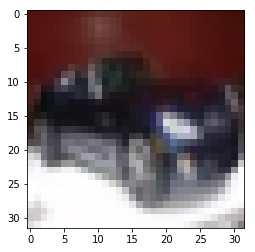

car


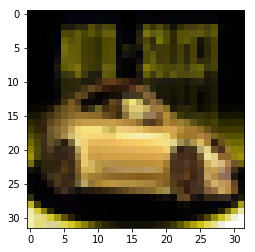

horse


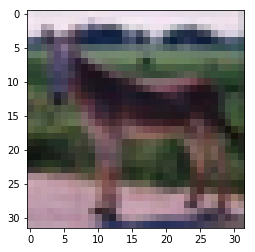

dog


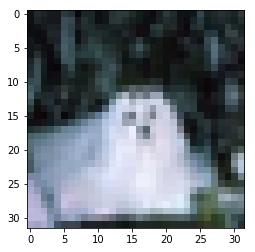

dog


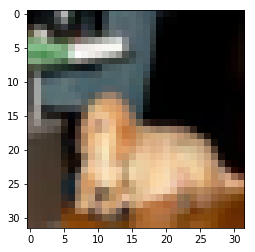

In [4]:
# Explore data
## YOUR CODE HERE ##
show5(train_loader)

In [5]:
trainset

Dataset CIFAR10
    Number of datapoints: 50000
    Split: train
    Root Location: ./data
    Transforms (if any): Compose(
                             RandomHorizontalFlip(p=0.5)
                             ToTensor()
                         )
    Target Transforms (if any): None

In [21]:
# size of trainset
len(trainset)

50000

In [22]:
# get sample of train data and see length
sample = next(iter(trainset))
len(sample)

2

In [23]:
# get the image and it's label
image, label = sample
type(image)

torch.Tensor

In [24]:
type(label)

int

In [25]:
# view image shape
image.shape

torch.Size([3, 32, 32])

In [26]:
torch.tensor(label).shape

torch.Size([])

In [27]:
image.squeeze().shape

torch.Size([3, 32, 32])

In [28]:
# length of test data
len(testset)

10000

cat


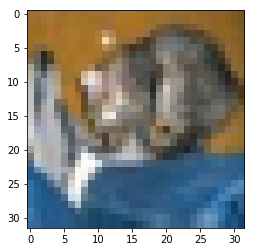

ship


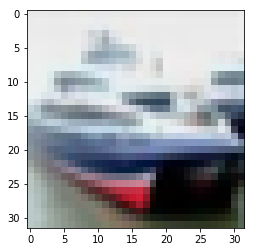

ship


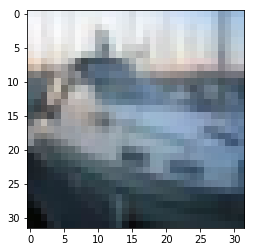

plane


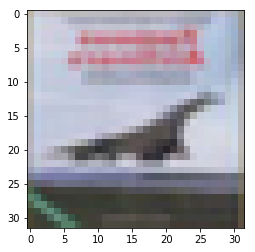

frog


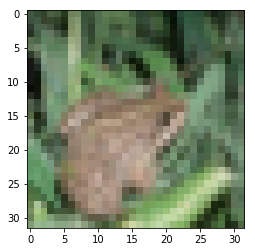

In [5]:
show5(test_loader)

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset. 
Feel free to construct a model of any architecture – feedforward, convolutional, or even something more advanced!

In [5]:
## YOUR CODE HERE ##

device = 'cuda' if torch.cuda.is_available() else 'cpu'

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3)
        self.conv2 = nn.Conv2d(32, 64, 3)
        self.conv3 = nn.Conv2d(64, 128, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(128 * 2 * 2, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 10)
        self.dropout1 = nn.Dropout(p=0.2, inplace=False)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.dropout1(x)
        x = self.pool(F.relu(self.conv2(x)))
        x = self.dropout1(x)
        x = self.pool(F.relu(self.conv3(x)))
        x = self.dropout1(x)
        x = x.view(-1, 128 * 2 * 2)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x) #output layer
        
        return x
    
model = Net()
model.to(device)

Net(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=512, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=32, bias=True)
  (fc4): Linear(in_features=32, out_features=10, bias=True)
  (dropout1): Dropout(p=0.2)
)

In [6]:
model.state_dict

<bound method Module.state_dict of Net(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=512, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=32, bias=True)
  (fc4): Linear(in_features=32, out_features=10, bias=True)
  (dropout1): Dropout(p=0.2)
)>

Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [7]:
## YOUR CODE HERE ##
criterion = nn.CrossEntropyLoss()

# Stochastic gradient descent: to perform parameter update for each training sample
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss during each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [8]:
## YOUR CODE HERE ##
epoch_losses = []

model.train()

for epoch in range(20):
    running_loss = 0.0
    saved_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        
        # get inputs and labels and convert to appropriate device
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        
        # zero the parameter gradients
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print stats
        running_loss += loss.item()
        if i % 2000 == 1999:  # print every 2000 mini-batches
            print('%d, %5d| loss: %.3f' %(epoch+1, i+1, running_loss/2000))
            
            saved_loss = running_loss
            running_loss = 0.0
    epoch_losses.append(saved_loss/10000)

print('Training done!')  # print when finished training

1,  2000| loss: 2.304
1,  4000| loss: 2.300
1,  6000| loss: 2.198
1,  8000| loss: 2.096
1, 10000| loss: 2.019
2,  2000| loss: 1.931
2,  4000| loss: 1.828
2,  6000| loss: 1.781
2,  8000| loss: 1.718
2, 10000| loss: 1.630
3,  2000| loss: 1.550
3,  4000| loss: 1.483
3,  6000| loss: 1.449
3,  8000| loss: 1.421
3, 10000| loss: 1.373
4,  2000| loss: 1.340
4,  4000| loss: 1.311
4,  6000| loss: 1.288
4,  8000| loss: 1.261
4, 10000| loss: 1.243
5,  2000| loss: 1.215
5,  4000| loss: 1.185
5,  6000| loss: 1.190
5,  8000| loss: 1.170
5, 10000| loss: 1.155
6,  2000| loss: 1.128
6,  4000| loss: 1.124
6,  6000| loss: 1.113
6,  8000| loss: 1.089
6, 10000| loss: 1.093
7,  2000| loss: 1.049
7,  4000| loss: 1.068
7,  6000| loss: 1.068
7,  8000| loss: 1.029
7, 10000| loss: 1.030
8,  2000| loss: 1.000
8,  4000| loss: 0.979
8,  6000| loss: 0.992
8,  8000| loss: 0.999
8, 10000| loss: 0.998
9,  2000| loss: 0.963
9,  4000| loss: 0.954
9,  6000| loss: 0.953
9,  8000| loss: 0.965
9, 10000| loss: 0.944
10,  2000|

Plot the training loss (and validation loss/accuracy, if recorded).

In [9]:
## YOUR CODE HERE ##
epoch_losses

[0.4038905206441879,
 0.3259261427104473,
 0.2745462804347277,
 0.24856674101650714,
 0.2309415731653571,
 0.21851373130865395,
 0.20609788771905005,
 0.19951859036013483,
 0.18885543845407665,
 0.18743674708660693,
 0.17991463386900722,
 0.17384739711284639,
 0.16859516934817656,
 0.1685409211764112,
 0.16352564843958245,
 0.15600774603094905,
 0.1586869150808081,
 0.1515178101210855,
 0.15065708347838372,
 0.1505628332162276]

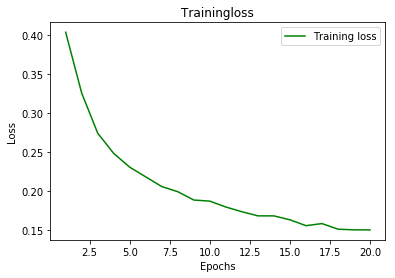

In [10]:
epochs = range(1,21)
plt.plot(epochs, epoch_losses, 'g', label='Training loss')

plt.title('Trainingloss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 70%, great work! 
This is a hard task to exceed 70% on.

If your accuracy is under 45%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [11]:
## YOUR CODE HERE ##

total = 0
correct = 0

model.eval()
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy: %d %%' % (100 * correct / total))

Accuracy: 76 %


In [12]:
checkpoint = {'model': model,
          'state_dict': model.state_dict(),
          'optimizer' : optimizer.state_dict()}

torch.save(checkpoint, 'checkpoint.pth')

/opt/conda/lib/python3.6/site-packages/torch/serialization.py:193: UserWarning: Couldn't retrieve source code for container of type Net. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [13]:
def load_checkpoint(filepath):
    checkpoint = torch.load(filepath)
    model = checkpoint['model']
    model.load_state_dict(checkpoint['state_dict'])
    for parameter in model.parameters():
        parameter.requires_grad = False

    model.eval()
    return model

model = load_checkpoint('checkpoint.pth')

In [130]:
model.to(device)

Net(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=512, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=32, bias=True)
  (fc4): Linear(in_features=32, out_features=10, bias=True)
  (dropout1): Dropout(p=0.2)
)

## Saving your model
Using `torch.save`, save your model for future loading.

In [129]:
## YOUR CODE HERE ##
torch.save(model, "saved_model.pth")

/opt/conda/lib/python3.6/site-packages/torch/serialization.py:193: UserWarning: Couldn't retrieve source code for container of type Net. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


## Make a Recommendation

Based on your evaluation, what is your recommendation on whether to build or buy? Explain your reasoning below.

Some things to consider as you formulate your recommendation:
* How does your model compare to Detectocorp's model?
* How does it compare to the far more advanced solutions in the literature? 
* What did you do to get the accuracy you achieved? 
* Is it necessary to improve this accuracy? If so, what sort of work would be involved in improving it?



Getting an accuracy of 75% which is more than Detectocorp's model. If this accuracy could be achieved in-house of this short period of time and reseach, then we could obviously improve on our in-house model. So my recommendation is that we use the in-house model and not buy from Detectocorp.

Comparing the accuracy of our in-house model to the advanced solutions in the literature, our accuracy is almost nearing **Deep Belief Networks; Krizhevsky, 2010** . So technically, the in-house model is 6th on the list.


To achive this accuracy, I tuned params like learning rate, batch size, layers of the architecture and training. Also shuffled the training data so that the images are well mixed up to avoid overfitting. Also worked on the number of epochs to make sure that the model does not overfit. I also used GPU which makes the model perform better.

Yes it necessary to improve the accuracy so that we can even achieve 100%. When looking at hard realtime time systems like in self driving cars, it is important that the model accurately identifies objects so that it doesn't make mistakes as it could be disastrous. In order to improve the model's accuracy, we could work on adding new layers and tuning the learning rate and epochs.

Thanks!

## Submit Your Project

When you are finished editing the notebook and are ready to turn it in, simply click the **SUBMIT PROJECT** button in the lower right.

Once you submit your project, we'll review your work and give you feedback if there's anything that you need to work on. If you'd like to see the exact points that your reviewer will check for when looking at your work, you can have a look over the project [rubric](https://review.udacity.com/#!/rubrics/3077/view).

## Load model

In [131]:
from PIL import Image


In [168]:
image_path = './car2.jpeg'

# image_path = './ship1.jpeg'

# image_path = 'www.cdc.gov/healthypets/images/pets/cute-dog-headshot.jpg'
# pil_image = Image.open(image_path)
pil_image = Image.open(image_path)

In [169]:
img_loader = transforms.Compose([
        transforms.Resize((32,32)),
        transforms.ToTensor()])
    
ts_image = img_loader(pil_image).float()


In [170]:
ts_image.shape

torch.Size([3, 32, 32])

In [171]:
ts_image.numpy()

array([[[ 0.87450981,  0.89803922,  0.91764706, ...,  0.90588236,
          0.88627452,  0.86666667],
        [ 0.90196079,  0.92156863,  0.93725491, ...,  0.92941177,
          0.9137255 ,  0.89411765],
        [ 0.9254902 ,  0.94117647,  0.95686275, ...,  0.94901961,
          0.93333334,  0.91764706],
        ..., 
        [ 0.4627451 ,  0.52156866,  0.57254905, ...,  0.3137255 ,
          0.21960784,  0.18039216],
        [ 0.42745098,  0.49803922,  0.54901963, ...,  0.34117648,
          0.27843139,  0.23137255],
        [ 0.40784314,  0.4509804 ,  0.50980395, ...,  0.27843139,
          0.24313726,  0.24313726]],

       [[ 0.87450981,  0.89803922,  0.91764706, ...,  0.9137255 ,
          0.89411765,  0.87058824],
        [ 0.88627452,  0.90980393,  0.92941177, ...,  0.92156863,
          0.90588236,  0.88235295],
        [ 0.90196079,  0.92156863,  0.93725491, ...,  0.93333334,
          0.9137255 ,  0.89411765],
        ..., 
        [ 0.29803923,  0.33725491,  0.38039216, ...,

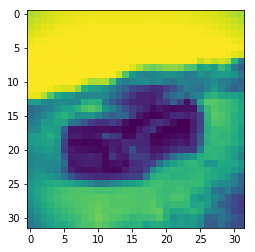

In [172]:
plt.imshow(ts_image[0])
plt.show()

In [173]:
ts_image.to(device)

tensor([[[ 0.8745,  0.8980,  0.9176,  ...,  0.9059,  0.8863,  0.8667],
         [ 0.9020,  0.9216,  0.9373,  ...,  0.9294,  0.9137,  0.8941],
         [ 0.9255,  0.9412,  0.9569,  ...,  0.9490,  0.9333,  0.9176],
         ...,
         [ 0.4627,  0.5216,  0.5725,  ...,  0.3137,  0.2196,  0.1804],
         [ 0.4275,  0.4980,  0.5490,  ...,  0.3412,  0.2784,  0.2314],
         [ 0.4078,  0.4510,  0.5098,  ...,  0.2784,  0.2431,  0.2431]],

        [[ 0.8745,  0.8980,  0.9176,  ...,  0.9137,  0.8941,  0.8706],
         [ 0.8863,  0.9098,  0.9294,  ...,  0.9216,  0.9059,  0.8824],
         [ 0.9020,  0.9216,  0.9373,  ...,  0.9333,  0.9137,  0.8941],
         ...,
         [ 0.2980,  0.3373,  0.3804,  ...,  0.1922,  0.1373,  0.1176],
         [ 0.2627,  0.3176,  0.3569,  ...,  0.2039,  0.1647,  0.1412],
         [ 0.2549,  0.2863,  0.3294,  ...,  0.1647,  0.1451,  0.1490]],

        [[ 0.8588,  0.8824,  0.9098,  ...,  0.9059,  0.8824,  0.8549],
         [ 0.8745,  0.8941,  0.9137,  ...,  0

In [174]:
ts_image.unsqueeze_(0)

tensor([[[[ 0.8745,  0.8980,  0.9176,  ...,  0.9059,  0.8863,  0.8667],
          [ 0.9020,  0.9216,  0.9373,  ...,  0.9294,  0.9137,  0.8941],
          [ 0.9255,  0.9412,  0.9569,  ...,  0.9490,  0.9333,  0.9176],
          ...,
          [ 0.4627,  0.5216,  0.5725,  ...,  0.3137,  0.2196,  0.1804],
          [ 0.4275,  0.4980,  0.5490,  ...,  0.3412,  0.2784,  0.2314],
          [ 0.4078,  0.4510,  0.5098,  ...,  0.2784,  0.2431,  0.2431]],

         [[ 0.8745,  0.8980,  0.9176,  ...,  0.9137,  0.8941,  0.8706],
          [ 0.8863,  0.9098,  0.9294,  ...,  0.9216,  0.9059,  0.8824],
          [ 0.9020,  0.9216,  0.9373,  ...,  0.9333,  0.9137,  0.8941],
          ...,
          [ 0.2980,  0.3373,  0.3804,  ...,  0.1922,  0.1373,  0.1176],
          [ 0.2627,  0.3176,  0.3569,  ...,  0.2039,  0.1647,  0.1412],
          [ 0.2549,  0.2863,  0.3294,  ...,  0.1647,  0.1451,  0.1490]],

         [[ 0.8588,  0.8824,  0.9098,  ...,  0.9059,  0.8824,  0.8549],
          [ 0.8745,  0.8941,  

In [175]:
model.to(device)

Net(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=512, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=32, bias=True)
  (fc4): Linear(in_features=32, out_features=10, bias=True)
  (dropout1): Dropout(p=0.2)
)

In [176]:
outputs = model(ts_image.to(device))

In [177]:
_, predicted = torch.max(outputs.data, 1)

In [178]:
predicted

tensor([ 1], device='cuda:0')

In [179]:
classes[predicted[0]]

'car'